# 亚马逊销售数据分析

## 分析目标

此数据分析报告的目的是，基于产品的价格和消费者的评分等属性，分析价格、评分、用户之间的关系。

## 简介

原始数据`amazon.csv`包含超过一千条亚马逊产品的评分、评论、价格等信息，数据来自于亚马逊官方网站上列出的详细信息。

`amazon.csv`每列的含义如下：  
- product_id ：产品id
- product_name：产品的名称
- category：产品的分类
- discounted_price：产品的折扣价格
- actual_price：产品的实际价格
- discount_percentage：产品折扣的百分比
- rating：消费者的评分
- rating_count：参与评分的消费者数量
- about_product：产品的描述
- user_id：为产品撰写评论的消费者id
- user_name：为产品撰写评论的消费者名称
- review_id：评论的id
- review_title：简短的评论题目
- review_content：评论内容
- img_link：产品的图片链接
- product_link：产品的官网链接

## 读取数据

导入数据分析所需要的库，并通过Pandas的read_csv函数，将原始数据文件`amazon.csv`里的数据内容，解析为DataFrame并赋值给变量original_data。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('amazon.csv')

In [3]:
original_data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## 评估和清理数据

在这一部分中，将对在上一部分建立的`original_data`DataFrame所包含的数据进行评估和清理。

主要从两个方面进行：结构和内容，即整齐度和干净度。

数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格”这三个标准；数据的内容性问题包括存在丢失数据、重复数据、无效数据等。

为了区分开经过清理的数的数据，我们创建新的变量cleaned_data，让它为original_data复的副本。我们之后的清理步骤都将被运用在cleaned_data上。

In [4]:
cleaned_data = original_data.copy()

### 数据整齐度

In [5]:
cleaned_data.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

从头部的10行数据来看,数据不存在结构性问题。

### 数据干净度

接下来通过info，对数据内容进行大致了解。

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

从输出结果来看，`cleaned_data`数据共有1465条观察值, 其中`rating_count`存在缺失值，将在后续进行评估和清理。  

数据类型方面，`product_id`表示乘客id、`user_id`表示为产品撰写评论的消费者id、`review_id`表示评论的id，数据类型不应为object，应为字符串。
`discounted_price`表示产品的折扣价格、`actual_price`表示产品的实际价格、`rating`表示消费者的评分、`rating_count`表示参与评分的消费者数量，数据类型都可转换为浮点数。  

以上数据类型需要进行数据格式转换。

In [7]:
cleaned_data['product_id'] = cleaned_data['product_id'].astype('str')
cleaned_data['user_id'] = cleaned_data['user_id'].astype('str')
cleaned_data['review_id'] = cleaned_data['review_id'].astype('str')

In [8]:
cleaned_data['discounted_price'] = cleaned_data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleaned_data['actual_price'] = cleaned_data['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
cleaned_data['rating'] = pd.to_numeric(cleaned_data['rating'], errors='coerce')
cleaned_data['rating_count'] = pd.to_numeric(cleaned_data['rating_count'].str.replace(',', ''), errors='coerce')

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   object 
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

#### 处理缺失数据

从info方法的输出结果来看，在`cleaned_data`中，`rating`、`rating_count`变量存在缺失值。

In [10]:
cleaned_data[cleaned_data['rating'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,16%,NaN,992.0,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [11]:
cleaned_data[cleaned_data['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


有一条`rating`数据和两条`rating_count`数据存在缺失，因其能为后续分析提供价值，所以可以用消费者的评分和参与评分的消费者数量的平均值对缺失值进行填充。

In [12]:
average_rating = cleaned_data['rating'].mean()
cleaned_data['rating'] = cleaned_data['rating'].fillna(average_rating)
cleaned_data['rating'].isna().sum()

0

In [13]:
average_rating_count = cleaned_data['rating_count'].mean()
cleaned_data['rating_count'] = cleaned_data['rating_count'].fillna(average_rating_count)
cleaned_data['rating_count'].isna().sum()

0

#### 处理重复数据

根据数据变量的含义以及内容来看，允许存在重复数据，因此不需要对重复数据进行处理。

#### 处理不一致数据

In [14]:
cleaned_data['category'].value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

从以上输出结果来看，不存在不一致数据。

#### 处理无效或错误数据

可以通过DataFrame的describe方法，对数值统计信息进行快速了解。

In [15]:
cleaned_data.describe()

,discounted_price,actual_price,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,4.096585,18295.541353
std,6944.304394,10874.826864,0.291574,42724.651512
min,39.000000,39.000000,2.000000,2.000000
25%,325.000000,800.000000,4.000000,1191.000000
50%,799.000000,1650.000000,4.100000,5179.000000
75%,1999.000000,4295.000000,4.300000,17394.000000
max,77990.000000,139900.000000,5.000000,426973.000000


从以上统计信息来看，cleaned_data里不存在脱离现实意义的数值。

## 探索数据

在着手分析之前，我们可以先借助数据可视化，探索数值变量的分布，为后续的进一步分析提供方向。

In [16]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [17]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 价格分布

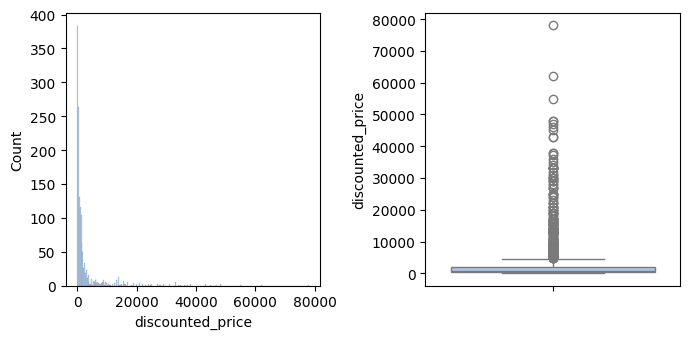

In [18]:
figure, axes = plt.subplots(1, 2)
sns.histplot(cleaned_data, x='discounted_price', ax=axes[0])
sns.boxplot(cleaned_data, y='discounted_price', ax=axes[1])
plt.show()

从图中可以看出，数据集中大部分的折扣价格相对较低，集中在接近于 0 的区域。但有一些折扣价格非常高的值，显示出数据中存在少数价格异常高的产品。

### 评分分布

<Axes: xlabel='rating', ylabel='Count'>

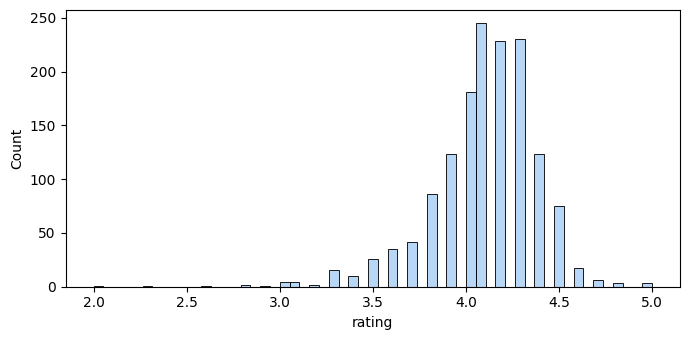

In [19]:
sns.histplot(cleaned_data,x='rating')

数据集中的产品评分集中在4.0-4.5分之间。

### 折扣率和评分的关系

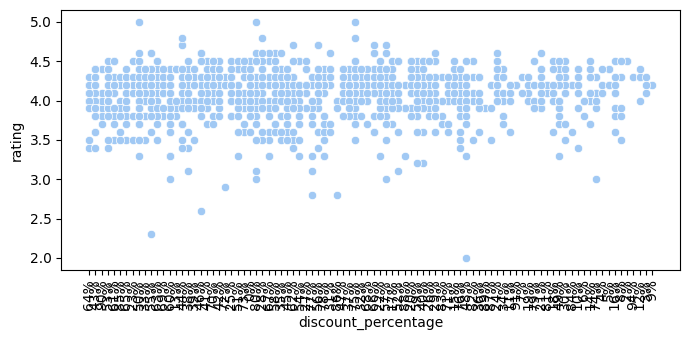

In [29]:
from matplotlib.ticker import MaxNLocator
sns.scatterplot(cleaned_data, x='discount_percentage', y='rating')
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.show()

从散点图来看，折扣率和评分之间似乎没有明显的线性相关性。

## 分析数据

此数据集的分析可以从产品价格分析，评分分析，评价数分析，分类分析，销售趋势分析，用户分析等方面来进行。

### 价格分析

In [30]:
discount_rate = (cleaned_data['discounted_price'] / cleaned_data['actual_price']) * 100
average_discount_rate = discount_rate.mean()
print(f'平均折扣率为：{average_discount_rate:.2f}%')

平均折扣率为：52.32%


### 评分分析

In [31]:
max_rating = cleaned_data['rating'].max()
highest_rated_products = cleaned_data[cleaned_data['rating']== max_rating]
highest_rated_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
174,B0BP7XLX48,Syncwire LTG to USB Cable for Fast Charging Co...,Computers&Accessories|Accessories&Peripherals|...,399.0,1999.0,80%,5.0,5.000000,This sturdy and durable cable made of tpe and ...,"AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXC...","Amazon Customer,kamal sahota,Pankaj,luvsmplcty...","R1L2JNO4Y3BHYF,R2346F22YLZ9IG,R3A4GAQTCPE5U7,R...","Good,Superb quality,Good products nice one,Wo...",Product is good in quality. Working good with ...,https://m.media-amazon.com/images/I/317OoQfs1g...,https://www.amazon.in/Syncwire-Cable-Charging-...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,75%,5.0,18295.541353,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...
775,B09ZHCJDP1,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,Computers&Accessories|Accessories&Peripherals|...,499.0,1000.0,50%,5.0,23.000000,Reliable wireless connection up to 10m|Advance...,"AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626M...","Rambeer kumar,Ramesh,Digambar Shelke,awadhesh ...","R76XPXMKXLWKH,R23S77AWPH5FP5,RK7Q6W5FOPESC,R2X...","Very responsive and stylish mouse,Simply Aweso...",I really like this wireless mouse it has becam...,https://m.media-amazon.com/images/I/31+Rg6Z46d...,https://www.amazon.in/Wireless-Connection-Batt...


评分最高的是电脑及配件、周边类产品。

In [32]:
min_rating = cleaned_data['rating'].min()
lowest_rated_products = cleaned_data[cleaned_data['rating']== min_rating]
lowest_rated_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48%,2.0,2.0,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...


评分最低的是一款电取暖器。

### 评价数分析

In [33]:
max_rating_count = cleaned_data['rating_count'].max()
highest_rating_count_products = cleaned_data[cleaned_data['rating_count']== max_rating_count]
highest_rating_count_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
12,B07KSMBL2H,AmazonBasics Flexible Premium HDMI Cable (Blac...,"Electronics|HomeTheater,TV&Video|Accessories|C...",219.0,700.0,69%,4.4,426973.0,"Flexible, lightweight HDMI cable for connectin...","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41nPYaWA+M...,https://www.amazon.in/AmazonBasics-Flexible-HD...
47,B014I8SSD0,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,475.0,35%,4.4,426973.0,Please select appropriate display resolution &...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41bCxnHksn...,https://www.amazon.in/AmazonBasics-High-Speed-...
65,B014I8SX4Y,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","Electronics|HomeTheater,TV&Video|Accessories|C...",309.0,1400.0,78%,4.4,426973.0,HDMI A Male to A Male Cable: Supports Ethernet...,"AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTI...","Rishav Gossain,Shashank Mallamraju,Purnendu,gu...","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3...","It's quite good and value for money,Works well...",I am using it for 14 days now. The experience ...,https://m.media-amazon.com/images/I/41eJqkFjCR...,https://www.amazon.in/AmazonBasics-High-Speed-...


评价数最多的是视频线缆。

In [34]:
min_rating_count = cleaned_data['rating_count'].min()
lowest_rating_count_products = cleaned_data[cleaned_data['rating_count']== min_rating_count]
lowest_rating_count_products

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1309,B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48%,2.0,2.0,Khaitan Orfin Fan heater for Home and kitchen|...,"AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...","Manidipa Sengupta,Vidisha","R1OO2ED6615EX1,RR4S5JTJMCPA5","Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Khaitan-ORFin-heater-Hom...
1459,B0B3JSWG81,NGI Store 2 Pieces Pet Hair Removers for Your ...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",199.0,999.0,80%,3.1,2.0,"Versatile, Protects Your Clothes: MoveCatcher ...",AFPKVN5KLHB4MHSYDS25Q5MIWWKQ,Kunal Sen,R18OKMWGX8SA0L,Useless,Does not work as advertised at all. The pieces...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Hair-Removers-Laundry-Re...


评价数最少的是取暖器和宠物除毛器。

### 分类分析

In [35]:
# 按类别分组并计算统计信息
category_stats = cleaned_data.groupby('category').agg({
    'discounted_price': ['mean'],
    'rating': ['mean'],
    'category': ['count']})

In [36]:
# 重命名列名
category_stats.columns = ['average_price', 'average_rating', 'product_count']
category_stats

,average_price,average_rating,product_count
category,,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,2339.000000,3.800000,1
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,221.500000,4.150000,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,649.000000,3.500000,1
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,574.000000,3.600000,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,749.000000,4.050000,2
...,...,...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",150.000000,4.250000,2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",255.000000,4.150000,2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",329.000000,4.300000,2


### 用户分析

In [37]:
# 按 user_id 分组并计算评论数量
user_review_counts = cleaned_data.groupby('user_id')['review_id'].count().reset_index()
user_review_counts.columns = ['user_id', 'review_count']

# 找出评论数量最多的用户
most_active_user = user_review_counts.loc[user_review_counts['review_count'].idxmax()]
print(f'最活跃用户是：{most_active_user}')

最活跃用户是：user_id         AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...
review_count                                                   10
Name: 1048, dtype: object
